In [60]:
from scipy import stats
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import quandl
%matplotlib inline
quandl.ApiConfig.api_key = "ns1acVsZ-ZgxKTDdsDLA"

In [31]:
#Doing a lineaer regression

In [36]:
#SPY is an ETF that is used to track the S&P 500
spy_etf = web.DataReader('SPY', 'yahoo')

In [42]:
start = pd.to_datetime('2015-06-01')
end = pd.to_datetime('2020-05-29')

In [43]:
aapl = web.DataReader('AAPL','yahoo',start,end)

In [44]:
#Now lets check to see if there is a relationship between apple stock performance and overall
#market performance using CAPM

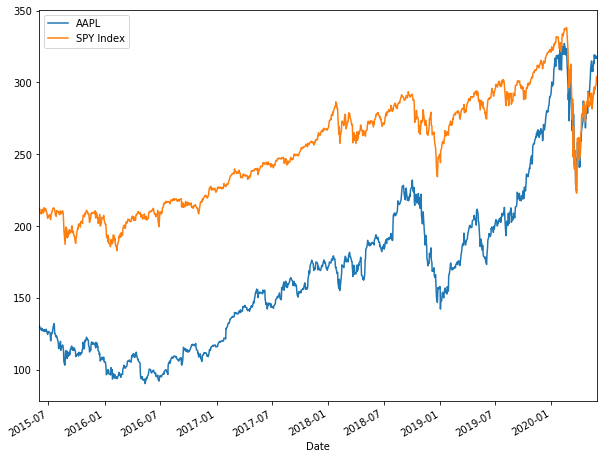

In [47]:
aapl['Close'].plot(label='AAPL',figsize = (10,8));
spy_etf['Close'].plot(label = 'SPY Index');
plt.legend();

In [50]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

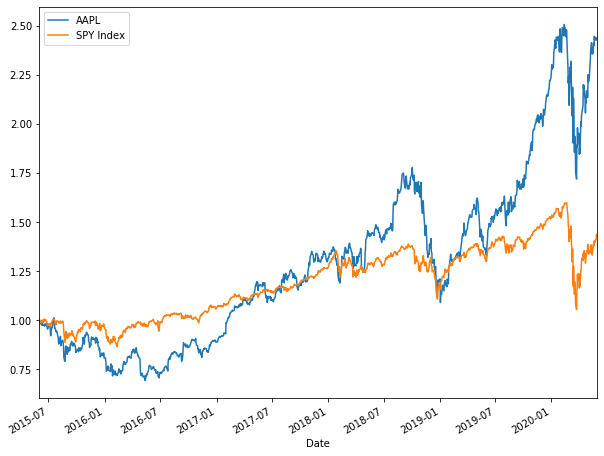

In [51]:
aapl['Cumulative'].plot(label = 'AAPL', figsize = (10,8))
spy_etf['Cumulative'].plot(label = 'SPY Index', figsize = (10,8) )
plt.legend()

In [53]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

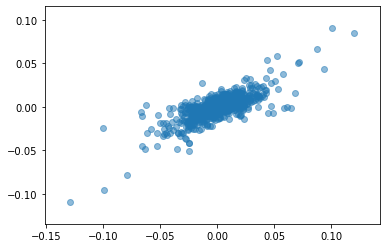

In [54]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha = 0.5)

In [55]:
#We can see that there is slight correlation between the overall market performance and that of apples
#Now to find the values for the CAPM

In [56]:
beta, alpha, r_value, p_value, std_err = stats.linregress(aapl['Daily Return'].iloc[1:] , spy_etf['Daily Return'].iloc[1:])

In [57]:
#Slope
beta

0.4999731814215877

In [58]:
#Intercept
alpha

-7.649266114359446e-05

In [59]:
r_value

0.7643713037269579

In [61]:
#Create some 'noise' data in order to see if CAPM is working properly

In [62]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [65]:
noisy_spy_etf = spy_etf['Daily Return'].iloc[1:] + noise

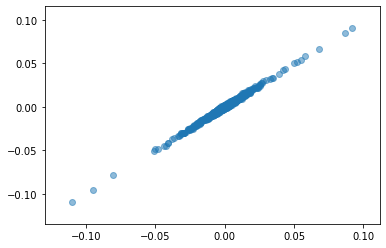

In [67]:
plt.scatter(noisy_spy_etf,spy_etf['Daily Return'].iloc[1:], alpha = 0.5)

In [68]:
beta, alpha, r_value, p_value, std_err = stats.linregress(noisy_spy_etf , spy_etf['Daily Return'].iloc[1:])

In [69]:
#Noitice how beta value is close to 1
#We can see with this that CAPM is working as expected
beta

0.9920664158759966